<h1><center>Taxi Fare Prediction using KNN<center><h1>


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [40]:
%cd /content/drive/MyDrive/Colab Notebooks/dataset/taxi_fare


/content/drive/MyDrive/Colab Notebooks/dataset/taxi_fare


<h2>Reading the CSV file and View the dataset.</br> Dataset Shape, Information & Data types are also shown here.</h2>

In [9]:
train_df=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/dataset/taxi_fare/train.csv")
train_df

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0
...,...,...,...,...,...,...,...,...
209668,1617.0,8.42,1.0,150.00,47,5.800,202.800,0
209669,438.0,1.29,1.0,48.75,12,34.575,95.325,1
209670,571.0,2.82,1.0,63.75,0,6.000,69.750,0
209671,491.0,2.16,1.0,56.25,0,13.500,69.750,0


In [10]:
train_df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [11]:
train_df.shape

(209673, 8)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [13]:
train_df.dtypes

trip_duration         float64
distance_traveled     float64
num_of_passengers     float64
fare                  float64
tip                     int64
miscellaneous_fees    float64
total_fare            float64
surge_applied           int64
dtype: object

In [14]:
train_df.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied'],
      dtype='object')

**<h2>Data Preprocessing<h2>**


<p align="justify">
At first we check the missing/null value. We didtn't found any null value in this data set. Then check the duplicate value and found 4325 duplicate value, then removed the duplicated value. After that we use train_df.describe()function to generates various descriptive statistics of the numerical columns in the DataFrame. This includes count, mean, standard deviation, minimum, 25%, 50%, 75%, median and maximum.
</p>

In [15]:
train_df.isna().sum().sort_values(ascending=False)

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

In [16]:
train_df.duplicated().value_counts()

False    205348
True       4325
dtype: int64

In [17]:
train_df=train_df.drop_duplicates()
train_df

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0
...,...,...,...,...,...,...,...,...
209668,1617.0,8.42,1.0,150.00,47,5.800,202.800,0
209669,438.0,1.29,1.0,48.75,12,34.575,95.325,1
209670,571.0,2.82,1.0,63.75,0,6.000,69.750,0
209671,491.0,2.16,1.0,56.25,0,13.500,69.750,0


In [18]:
train_df.duplicated().sum()

0

In [19]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
trip_duration,205348.0,1189.102226,4824.302160,0.00,454.000,716.00,1110.000,86387.00
distance_traveled,205348.0,5.123167,126.528223,0.02,1.980,3.25,5.810,57283.91
num_of_passengers,205348.0,1.298654,0.939258,0.00,1.000,1.00,1.000,9.00
fare,205348.0,100.656568,86.142902,0.00,52.500,78.75,116.250,4466.25
tip,205348.0,13.247560,20.507879,0.00,0.000,9.00,20.000,2500.00
miscellaneous_fees,205348.0,15.294384,12.621609,-0.50,6.000,9.75,26.525,435.00
total_fare,205348.0,129.198512,99.283531,0.00,73.125,103.50,153.450,4472.25
surge_applied,205348.0,0.285803,0.451797,0.00,0.000,0.00,1.000,1.00


# **Here is the correlations of the attributes**

<Axes: >

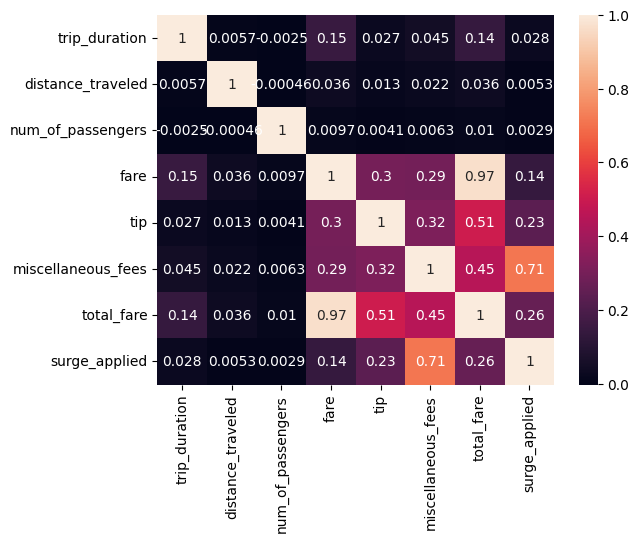

In [38]:
sns.heatmap(train_df.corr(), annot = True)

In [21]:
train_df.sort_values(by='total_fare',ascending=True).head(10)

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
196978,38.0,0.64,1.0,0.0,0,0.0,0.0,0
165251,36.0,6.60,1.0,0.0,0,0.0,0.0,0
201515,3796.0,17.70,1.0,0.0,0,0.0,0.0,0
45446,98.0,0.05,1.0,0.0,0,0.0,0.0,0
172568,2064.0,18.83,1.0,0.0,0,0.0,0.0,0
157026,1386.0,6.92,0.0,0.0,0,0.0,0.0,0
152693,1835.0,9.01,2.0,0.0,0,0.0,0.0,0
165635,68.0,0.32,1.0,0.0,0,0.0,0.0,0
2385,82.0,0.16,1.0,0.0,0,0.0,0.0,0
144966,7977.0,16.58,2.0,0.0,0,0.0,0.0,0


In [22]:
train_df.nlargest(10,'fare')

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
34028,70691.0,8.37,1.0,4466.25,0,6.000,4472.250,0
62108,8231.0,169.90,1.0,3963.75,0,6.000,3969.750,0
31936,55232.0,54.09,2.0,3896.25,0,13.500,3909.750,0
62607,61435.0,9.19,1.0,3873.75,0,13.500,3887.250,0
34734,13755.0,315.25,1.0,3802.50,0,55.125,3857.625,0
75639,53422.0,23.48,1.0,3487.50,0,6.000,3493.500,0
40943,48885.0,26.18,1.0,3240.00,0,62.625,3302.625,0
52534,10.0,0.03,2.0,3000.00,0,2.250,3002.250,0
123486,12.0,0.08,2.0,3000.00,0,2.250,3002.250,0
150484,5.0,0.10,1.0,3000.00,0,2.250,3002.250,0


In [23]:
greater_than_3000=train_df['total_fare']>3000
train_df[greater_than_3000].value_counts().sum()

11

Text(0.5, 1.0, 'Distance travelled Vs Total Fare')

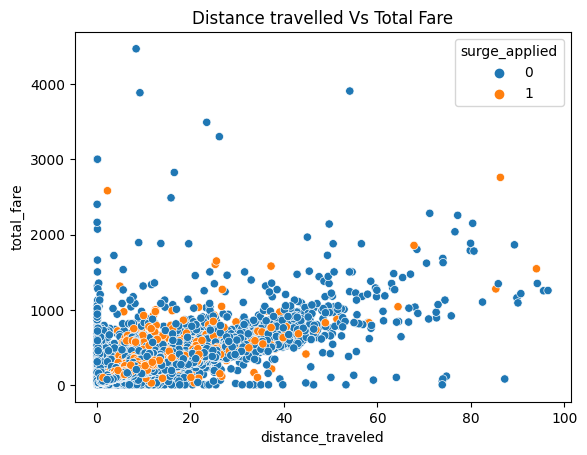

In [24]:
sns.scatterplot(x=train_df[train_df['distance_traveled']<100]['distance_traveled'], y=train_df['total_fare'], hue=train_df['surge_applied'])
plt.title('Distance travelled Vs Total Fare')

In [25]:
train_df['surge_applied'].value_counts()

0    146659
1     58689
Name: surge_applied, dtype: int64

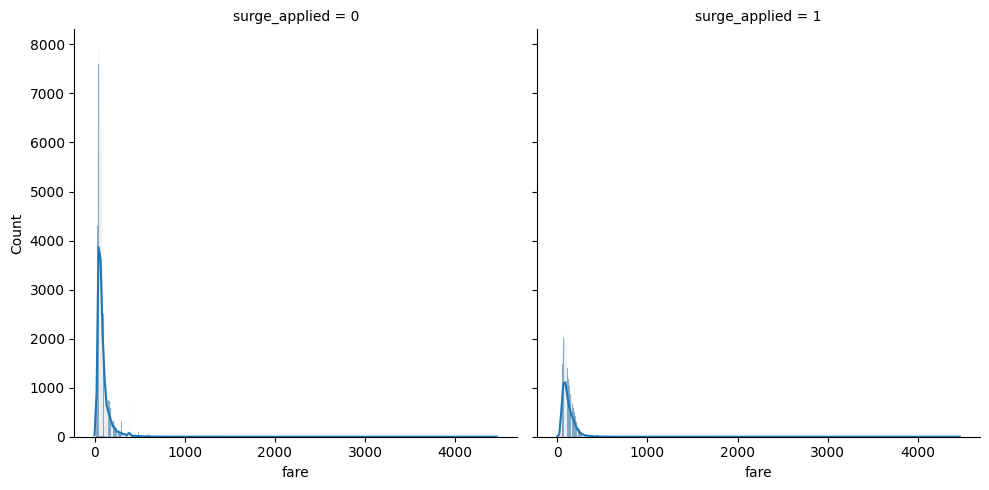

In [26]:
sns.displot(data=train_df, x="fare", col="surge_applied", kde=True)
plt.show()

# KNN Implementation

In [27]:
X = train_df[['trip_duration', 'distance_traveled', 'num_of_passengers', 'surge_applied']].values
y = train_df['fare'].values

In [28]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def manhattan_distance(point1, point2):
    return np.sum(np.abs(point1 - point2))

def minkowski_distance(point1, point2, p):
    return np.power(np.sum(np.power(np.abs(point1 - point2), p)), 1/p)

def knn_predict(X_train, y_train, x_new, k, distance_metric):
    distances = []

    for i in range(len(X_train)):
        if distance_metric == 'euclidean':
            distance = euclidean_distance(x_new, X_train[i])
        elif distance_metric == 'manhattan':
            distance = manhattan_distance(x_new, X_train[i])
        elif distance_metric == 'minkowski':
            distance = minkowski_distance(x_new, X_train[i], p=3)

        distances.append((distance, y_train[i]))

    distances.sort(key=lambda x: x[0])
    nearest_neighbors = distances[:k]

    total_fare_sum = sum(neighbor[1] for neighbor in nearest_neighbors)
    prediction = total_fare_sum / k
    return prediction

In [29]:
x_new = np.array([1076, 4.18, 1, 1], dtype=np.float32)
for k_value in [3, 5, 7]:
    prediction = knn_predict(X, y, x_new, k=k_value, distance_metric='euclidean')
    print(f'Prediction for k={k_value}: {prediction}')

Prediction for k=3: 98.75
Prediction for k=5: 99.75
Prediction for k=7: 99.10714285714286


# Predictions on Test Data

In [30]:
test_data=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/dataset/taxi_fare/test.csv")

In [31]:
test_data

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,1076,4.18,1,0,0,13.500,0,0
1,429,1.48,4,0,0,13.500,0,0
2,856,4.15,1,0,24,6.000,0,0
3,622,3.22,1,0,15,5.625,0,0
4,507,3.98,1,0,0,2.250,0,0
...,...,...,...,...,...,...,...,...
203,417,1.51,1,0,10,6.200,0,0
204,313,1.24,1,0,9,6.450,0,0
205,2158,17.49,1,0,52,20.825,0,0
206,1615,6.12,1,0,8,26.125,0,1


In [32]:
X_test_csv = test_data[['trip_duration', 'distance_traveled', 'num_of_passengers', 'surge_applied']].values

In [33]:
for k_value in [3, 5, 7]:
    predictions = []

    for i in range(len(X_test_csv)):
        x_new = X_test_csv[i]
        prediction = knn_predict(X, y, x_new, k=k_value, distance_metric='euclidean')
        predictions.append(prediction)
    test_data[f'prediction_k{k_value}'] = predictions

print(test_data)

     trip_duration  distance_traveled  num_of_passengers  fare  tip  \
0             1076               4.18                  1     0    0   
1              429               1.48                  4     0    0   
2              856               4.15                  1     0   24   
3              622               3.22                  1     0   15   
4              507               3.98                  1     0    0   
..             ...                ...                ...   ...  ...   
203            417               1.51                  1     0   10   
204            313               1.24                  1     0    9   
205           2158              17.49                  1     0   52   
206           1615               6.12                  1     0    8   
207            923               4.38                  1     0    0   

     miscellaneous_fees  total_fare  surge_applied  prediction_k3  \
0                13.500           0              0          96.25   
1        

<h2>R^2 Score</h2>
<p align="justify">
<b>When k=3: 1.0</b><br>
An R^2 score of 1.0 means that your model perfectly explains the variance in the target variable when using 3 neighbors. This is an ideal scenario, but it could also be a sign of overfitting, especially if the model has too much complexity for the given data. It's crucial to validate the model on unseen data to ensure its generalization performance.

<b>When k=5: 0.9470888781770526</b><br>
A high R^2 score of approximately 0.95 suggests that the model, using 5 neighbors, explains about 94.71% of the variance in the target variable. This is a good result and indicates a strong ability to capture the underlying patterns in the data.

<b>When k=7: 0.9580723468271762</b><br>
With k=7, the model explains approximately 95.81% of the variance in the target variable. This is consistent with the high performance observed with k=5, suggesting that the model continues to perform well.
</p>

In [36]:
from sklearn.metrics import r2_score
actual_fares = test_data['prediction_k3'].values
for k_value in [3, 5, 7]:
    predictions = test_data[f'prediction_k{k_value}'].values
    r2 = r2_score(y_true=actual_fares, y_pred=predictions)
    print(f'R^2 Score for k={k_value}: {r2}')

R^2 Score for k=3: 1.0
R^2 Score for k=5: 0.9470888781770526
R^2 Score for k=7: 0.9580723468271762


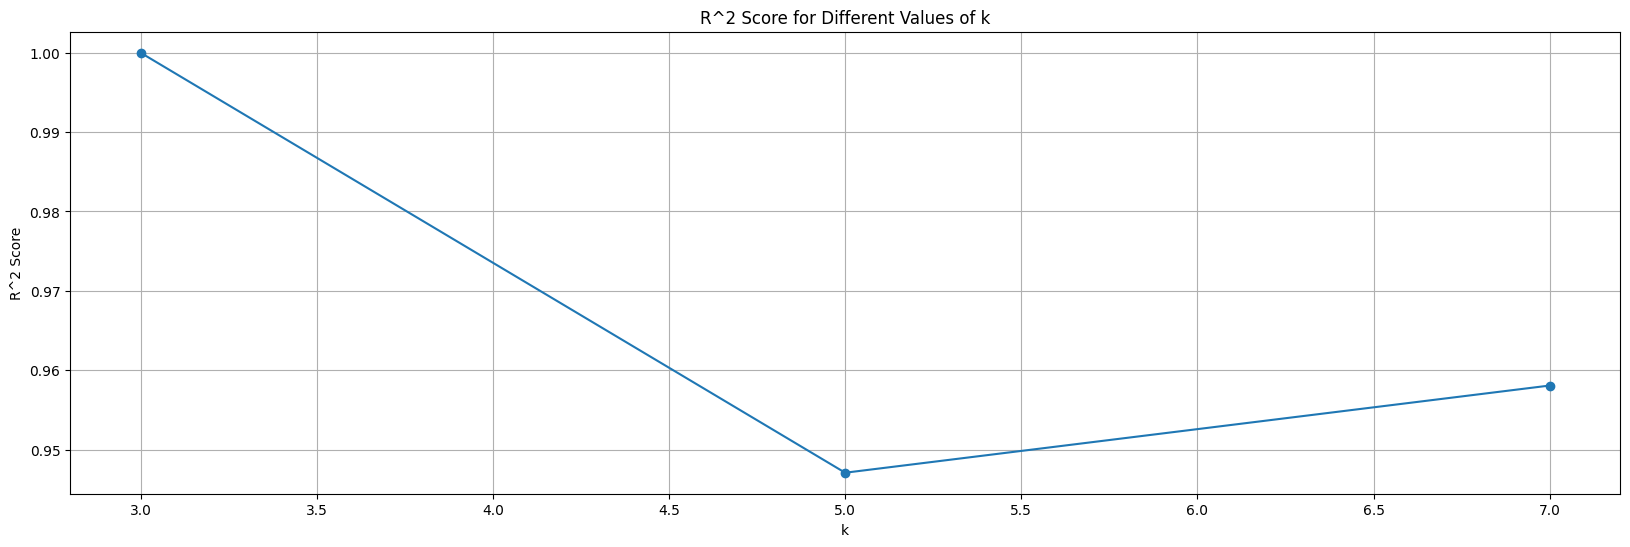

In [37]:
import matplotlib.pyplot as plt

k_values = [3, 5, 7]
r2_scores = [1.0, 0.9470888781770526, 0.9580723468271762]

plt.figure(figsize=(20, 6))
plt.plot(k_values, r2_scores, marker='o', linestyle='-')
plt.title('R^2 Score for Different Values of k')
plt.xlabel('k')
plt.ylabel('R^2 Score')
plt.grid(True)
plt.show()